In [1]:
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

# Large margin classification

## Data

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

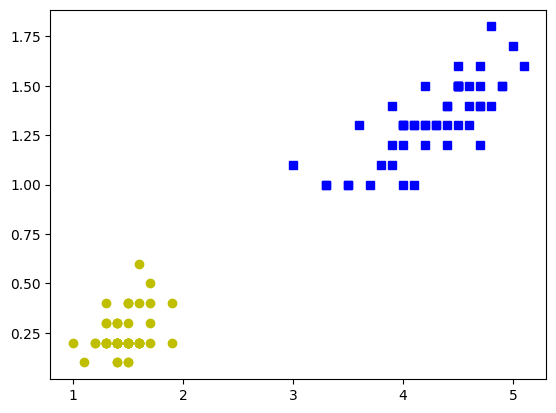

In [3]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.show()

## SVM model

In [6]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

SVC(C=1e+100, kernel='linear')

In [7]:
svm_clf.intercept_, svm_clf.coef_

(array([-3.78823471]), array([[1.29411744, 0.82352928]]))

In [8]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

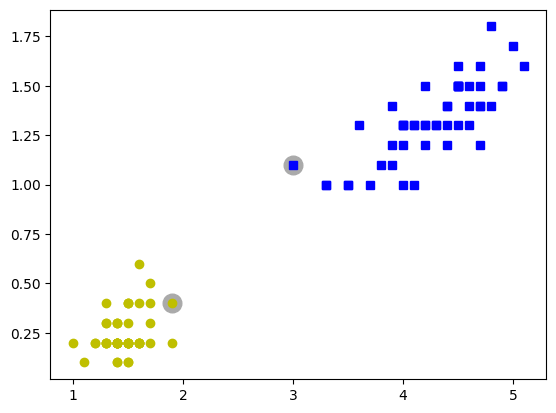

In [9]:


svs =  svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA')#,zorder=-8)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.show()

## prediction

In [10]:
X[1,:]

array([1.4, 0.2])

In [11]:
svm_clf.predict(X[:3,:])

array([0, 0, 0])

In [12]:
svm_clf.decision_function(X[:3,:])

array([-1.81176444, -1.81176444, -1.94117619])

In [13]:
svm_clf.decision_function(X[80:83,:])

array([2.03529375, 1.82352908, 2.24705842])

# Soft margin linear SVM classifier

## Data

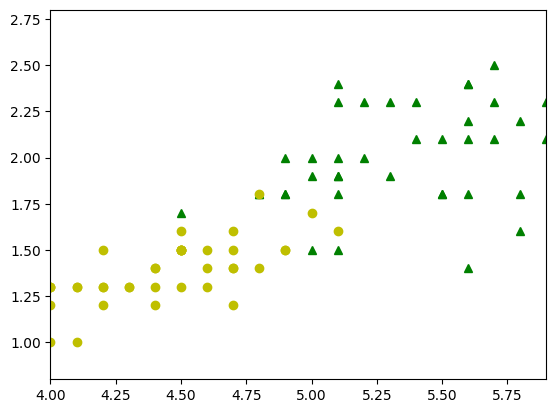

In [14]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.axis([4, 5.9, 0.8, 2.8])
plt.show()

## Model

In [15]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_std = scaler.fit_transform(X)


svm_clf1 = SVC(kernel="linear", C=1)
svm_clf2 = SVC(kernel="linear", C=10)

# svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
# svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

svm_clf1.fit(X_std, y)
svm_clf2.fit(X_std, y)


SVC(C=10, kernel='linear')

In [16]:
svm_clf1.support_vectors_

array([[0.64908342, 0.3957741 ],
       [0.47857113, 0.3957741 ],
       [0.53540856, 0.52740629],
       [0.42173371, 0.3957741 ],
       [0.59224599, 0.79067065],
       [0.64908342, 0.3957741 ],
       [0.59224599, 0.26414192],
       [0.70592084, 0.65903847],
       [0.42173371, 0.3957741 ],
       [0.76275827, 0.52740629],
       [0.42173371, 0.3957741 ],
       [0.42173371, 0.52740629],
       [0.53540856, 0.3957741 ],
       [0.76275827, 0.92230284],
       [0.42173371, 0.65903847],
       [0.70592084, 0.3957741 ],
       [0.64908342, 0.79067065],
       [0.59224599, 0.79067065],
       [0.64908342, 0.79067065],
       [1.16062026, 0.52740629],
       [0.76275827, 0.3957741 ],
       [1.0469454 , 0.26414192],
       [0.59224599, 0.79067065],
       [0.76275827, 0.92230284],
       [0.70592084, 0.92230284],
       [0.76275827, 0.79067065]])

In [17]:
svm_clf2.support_vectors_

array([[0.64908342, 0.3957741 ],
       [0.53540856, 0.52740629],
       [0.59224599, 0.79067065],
       [0.64908342, 0.3957741 ],
       [0.70592084, 0.65903847],
       [0.76275827, 0.52740629],
       [0.42173371, 0.52740629],
       [0.53540856, 0.3957741 ],
       [0.42173371, 0.65903847],
       [0.70592084, 0.3957741 ],
       [0.64908342, 0.79067065],
       [0.59224599, 0.79067065],
       [0.64908342, 0.79067065],
       [0.76275827, 0.3957741 ],
       [1.0469454 , 0.26414192],
       [0.59224599, 0.79067065]])

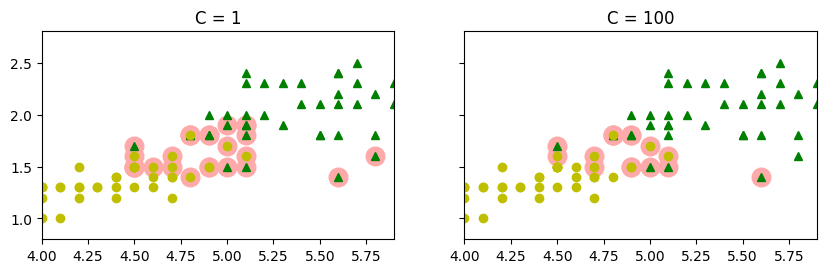

In [18]:
svs1 = svm_clf1.support_vectors_
svs2 = svm_clf2.support_vectors_

svs1_original = scaler.inverse_transform(svs1)
svs2_original = scaler.inverse_transform(svs2)


fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.scatter(svs1_original[:, 0], svs1_original[:, 1], s = 180, facecolors='#FFAAAA')
plt.title("C = 1")
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.scatter(svs2_original[:, 0], svs2_original[:, 1], s = 180, facecolors='#FFAAAA')
plt.title("C = 100")
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()

# Non-linear classification

## Gaussian RBF kernel

In [19]:
def rbf(x, l=-1, gamma = 0.3):
    r =  np.exp(- gamma * (x-l)**2 )
    return r.round(3)



In [20]:
print(rbf(-4, l = -2), rbf(-4, l = 1))
print(rbf(-3, l = -2), rbf(-3, l = 1))
print(rbf(-2, l = -2), rbf(-2, l = 1))
print(rbf(-1, l = -2), rbf(-1, l = 1))



0.301 0.001
0.741 0.008
1.0 0.067
0.741 0.301


In [21]:
# -4-(-2)


## Data

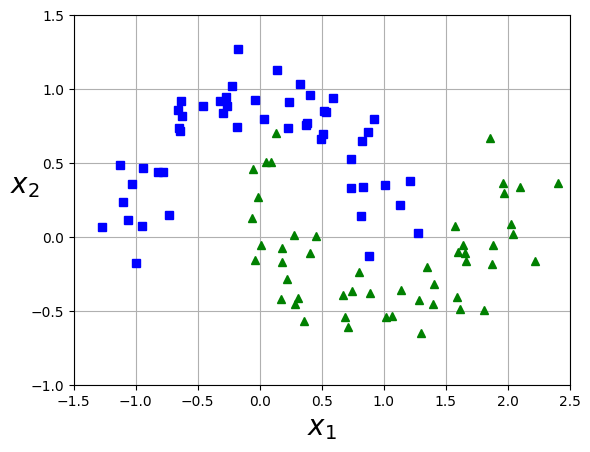

In [22]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [24]:
std = StandardScaler()
X_std = std.fit_transform(X)
svm_clf_rbf = SVC(kernel="rbf", gamma=5, C=0.001)

svm_clf_rbf.fit(X_std, y)


SVC(C=0.001, gamma=5)

In [25]:
svm_clf_rbf.predict(X_std[:10,:])

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1])